# Titanic data

The objective is to correctly classify who is going to survive and who is going to die.

Classification problem

To have a good Machine Learning model outcome or result we need good data. The better the data the better our model is going to perform. Feature engineering is really important, that is how we get improvement in performance...

In [1]:
 # Libraries
import pandas as pd
# to show all columns and lines 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [2]:
# importing data
path = '/Users/schama/Desktop/Mirror/00FSU/00CoursesSpring2023/ProjectsDataSci/Assignment3/train.csv'
path2 = '/Users/schama/Desktop/Mirror/00FSU/00CoursesSpring2023/ProjectsDataSci/Assignment3/test.csv'
train = pd.read_csv(path, index_col = 'PassengerId')
test = pd.read_csv(path2)

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#train.Cabin

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.shape

(418, 11)

In [7]:
train.shape

(891, 11)

In [8]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# What is the data and what should be done to each variable

- PassengerId - unique identification
- Survived - numeric. labels that we need to learn - 0 = No, 1 = Yes
- Pclass - numeric. first second or third class - 1 = 1st, 2 = 2nd, 3 = 3rd
- Name - complete name, can we extract the titles and see if it helps?
- Sex - male and female - needs encoding 0/1
- Age - numeric, but has missing?
- SibSp - # of siblings / spouses aboard the Titanic
- Parch - # of parents / children aboard the Titanic	
- ticket - ticket number, is it unique? DELETE? Get something?
- fare - ammount paid, has 1 missing in test set
- cabin - cabin number, maybe important to get deck? has a lot of missing
- embarked - port where got in the boat - C = Cherbourg, Q = Queenstown, S = Southampton - has missing


Since the data is small, we should use CV to check the models.

# The gold standard

Following the book to see if it really is the gold standard for Titanic

In [9]:
goldtrain = train.copy()
goldtest = test.copy()

In [10]:
goldtrain.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
goldtest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
goldtrain.drop('Cabin', axis=1, inplace=True)
goldtest.drop('Cabin', axis=1, inplace=True)

In [13]:
medianAge = goldtrain.Age.median()
goldtrain['Age'] = goldtrain.Age.fillna(medianAge)
medianAge2 = goldtest.Age.median()
goldtest['Age'] = goldtest.Age.fillna(medianAge2)

In [14]:
goldtrain.Embarked.fillna('U', inplace=True)
# test does not have missing in Embarked

In [15]:
# getting dummy variable with pandas
gender = pd.get_dummies(goldtrain['Sex'], prefix='Sex')
embarked = pd.get_dummies(goldtrain['Embarked'], prefix='Port')
goldtrain = pd.concat([goldtrain, gender, embarked], axis=1)

In [16]:
# for test
gender = pd.get_dummies(goldtest['Sex'], prefix='Sex')
embarked = pd.get_dummies(goldtest['Embarked'], prefix='Port')
goldtest = pd.concat([goldtest, gender, embarked], axis=1)

In [17]:
# inputing a column 'Port_U' in test with zeros
goldtest['Port_U'] = 0

In [18]:
goldtrain.drop(['Sex', 'Embarked'], axis=1, inplace=True)
goldtest.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [19]:
# one-hot encoding the class (does not seem to be an ordinal relationship with surviving!)
pclass = pd.get_dummies(goldtrain['Pclass'], prefix='class')
goldtrain = pd.concat([goldtrain, pclass], axis=1)
goldtrain.drop('Pclass', axis=1, inplace=True)

In [20]:
# now test
pclass = pd.get_dummies(goldtest['Pclass'], prefix='class')
goldtest = pd.concat([goldtest, pclass], axis=1)
goldtest.drop('Pclass', axis=1, inplace=True)

In [21]:
# turning age from numeric to categorical - if relationship between age and survival is not linear this will help
bins = [0,10,20,30,40,50,60,70,80]
age_group = pd.cut(goldtrain['Age'], bins)
goldtrain['Age_group'] = age_group
goldtrain.drop('Age', axis=1, inplace=True)


In [22]:
# now test
age_group = pd.cut(goldtest['Age'], bins)
goldtest['Age_group'] = age_group
goldtest.drop('Age', axis=1, inplace=True)

In [23]:
# encoding the age group for train
age = pd.get_dummies(goldtrain['Age_group'], prefix='Age')
goldtrain = pd.concat([goldtrain, age], axis=1)
goldtrain.drop(['Age_group'], axis=1, inplace=True)


In [24]:
# now for test
age = pd.get_dummies(goldtest['Age_group'], prefix='Age')
goldtest = pd.concat([goldtest, age], axis=1)
goldtest.drop(['Age_group'], axis=1, inplace=True)

In [25]:
# dropping identification columns
goldtrain.drop(['Name', 'Ticket'], axis=1, inplace=True)
goldtest.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [26]:
goldtrain.head()
goldtest.head()

,PassengerId,SibSp,Parch,Fare,Sex_female,Sex_male,Port_C,Port_Q,Port_S,Port_U,class_1,class_2,class_3,"Age_(0, 10]","Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]"
0,892,0,0,7.8292,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,893,1,0,7.0000,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,894,0,0,9.6875,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,895,0,0,8.6625,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,896,1,1,12.2875,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [27]:
goldtrain.shape
goldtest.shape

(418, 21)

In [28]:
goldtrain.isna().sum()
goldtest.isna().sum()

PassengerId     0
SibSp           0
Parch           0
Fare            1
Sex_female      0
Sex_male        0
Port_C          0
Port_Q          0
Port_S          0
Port_U          0
class_1         0
class_2         0
class_3         0
Age_(0, 10]     0
Age_(10, 20]    0
Age_(20, 30]    0
Age_(30, 40]    0
Age_(40, 50]    0
Age_(50, 60]    0
Age_(60, 70]    0
Age_(70, 80]    0
dtype: int64

In [29]:
# test has missing value in Fare - inputing median
medianFare = goldtest.Fare.median()
goldtest['Fare'] = goldtest.Fare.fillna(medianFare)

## Getting labels

In [30]:
# Making data easy to train and predict - checking if columns are the same in train and test
yt = goldtrain.Survived
xt = goldtrain.drop(['Survived'], axis=1)
x = goldtest.drop(['PassengerId'], axis=1)

In [31]:
xt.columns

Index(['SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Port_C', 'Port_Q',
       'Port_S', 'Port_U', 'class_1', 'class_2', 'class_3', 'Age_(0, 10]',
       'Age_(10, 20]', 'Age_(20, 30]', 'Age_(30, 40]', 'Age_(40, 50]',
       'Age_(50, 60]', 'Age_(60, 70]', 'Age_(70, 80]'],
      dtype='object')

In [32]:
x.columns

Index(['SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Port_C', 'Port_Q',
       'Port_S', 'Port_U', 'class_1', 'class_2', 'class_3', 'Age_(0, 10]',
       'Age_(10, 20]', 'Age_(20, 30]', 'Age_(30, 40]', 'Age_(40, 50]',
       'Age_(50, 60]', 'Age_(60, 70]', 'Age_(70, 80]'],
      dtype='object')

## Running models

In [33]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,xt,yt,cv=5)
gold_lr = cv.mean()
print(cv)
print(cv.mean())

[0.78212291 0.80898876 0.7752809  0.7752809  0.81460674]
0.7912560416797438


In [34]:
svc = SVC(probability = True)
cv = cross_val_score(svc,xt,yt,cv=5)
gold_svc = cv.mean()
print(cv)
print(cv.mean())

[0.58100559 0.71348315 0.68539326 0.68539326 0.67977528]
0.6690101060824808


In [35]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,xt,yt,cv=5)
gold_rf = cv.mean()
print(cv)
print(cv.mean())

[0.79329609 0.79775281 0.84831461 0.75280899 0.80337079]
0.7991086560793421


In [36]:
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('svc',svc)], voting = 'soft') 
cv = cross_val_score(voting_clf,xt,yt,cv=5)
gold_vote = cv.mean()
print(cv)
print(cv.mean())


[0.76536313 0.79213483 0.83707865 0.79213483 0.80898876]
0.7991400414286611


In [37]:
mean_gold = (gold_vote+gold_rf+gold_svc+gold_lr)/4
mean_gold

0.7646287113175569

## Making file to upload to Kaggle

In [38]:
# better results with RF
voting_clf.fit(xt,yt)
predict = voting_clf.predict(x).astype(int)
basic_submission = {'PassengerId': goldtest.PassengerId, 'Survived': predict}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('gold_vote.csv', index=False)

# Encoding - Not looking at the columns at all
## Let’s drop the Unknowns

Deleting when there are missing values, leaving a smaller dataset, and one hot encoding everything!

In [39]:
etrain = train.copy()
etest = test.copy()

In [40]:
etrain.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [41]:
etest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
# has a lot of missing so dropping everything
etrain.drop('Cabin', axis=1, inplace=True)
etest.drop('Cabin', axis=1, inplace=True)

In [43]:
# cannot drop for test otherwise will not get a score!
medianAge = etest.Age.median()
etest['Age'] = etest.Age.fillna(medianAge)

In [44]:
# test has missing value in Fare - inputing median
medianFare = etest.Fare.median()
etest['Fare'] = etest.Fare.fillna(medianFare)

In [45]:
# Dropping all other missing from train
etrain.dropna(inplace=True)

In [46]:
etest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [47]:
# Dropping columns that cannot one hot encode
etrain.drop(['Name','Ticket'], axis=1, inplace=True)
etest.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)


In [48]:
# one hot encoding what is categorical
etrain = pd.get_dummies(etrain, columns=['Sex','Embarked'], prefix=['sex', 'port'])
etest = pd.get_dummies(etest, columns=['Sex','Embarked'], prefix=['sex', 'port'])


In [49]:
etest.head()

,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,port_C,port_Q,port_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [50]:
etrain.shape

(712, 11)

## Getting labels and making it easy to train and predict

In [51]:
# Making data easy to train and predict - checking if columns are the same in train and test
yt = etrain.Survived
xt = etrain.drop(['Survived'], axis=1)
x = etest

## Running models

In [52]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,xt,yt,cv=5)
e_lr = cv.mean()
print(cv)
print(cv.mean())

[0.74825175 0.83216783 0.76760563 0.76760563 0.80985915]
0.7850980005909584


In [53]:
svc = SVC(probability = True)
cv = cross_val_score(svc,xt,yt,cv=5)
e_svc = cv.mean()
print(cv)
print(cv.mean())

[0.53846154 0.74825175 0.68309859 0.70422535 0.68309859]
0.6714271643849109


In [54]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,xt,yt,cv=5)
e_rf = cv.mean()
print(cv)
print(cv.mean())

[0.74825175 0.8041958  0.8028169  0.75352113 0.83098592]
0.7879542992219049


In [55]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('svc',svc)], voting = 'soft') 
cv = cross_val_score(voting_clf,xt,yt,cv=5)
e_vote = cv.mean()
print(cv)
print(cv.mean())

[0.72027972 0.81118881 0.83802817 0.8028169  0.82394366]
0.7992514527725796


In [56]:
mean_e = (e_vote+e_rf+e_svc+e_lr)/4
mean_e

0.7609327292425885

## Making file to upload to Kaggle

In [57]:
rf.fit(xt,yt)
predict = rf.predict(x).astype(int)
basic_submission = {'PassengerId': goldtest.PassengerId, 'Survived': predict}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('e_RF.csv', index=False)

In [58]:
voting_clf.fit(xt,yt)
predict = voting_clf.predict(x).astype(int)
basic_submission = {'PassengerId': goldtest.PassengerId, 'Survived': predict}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('e_vote.csv', index=False)

# leaving identification column
## Does Identity matter?

So include PassengerId as a feature when training

In [59]:
ctrain = pd.read_csv(path)
ctest = test.copy()

In [60]:
ctrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
# dealing with missing values - deleting column when it is a lot and rows when less
# has a lot of missing so dropping everything from cabin
ctrain.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)
ctest.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)
# cannot drop for test otherwise will not get a score!
medianAge = ctest.Age.median()
ctest['Age'] = ctest.Age.fillna(medianAge)
# test has missing value in Fare - inputing median
medianFare = ctest.Fare.median()
ctest['Fare'] = ctest.Fare.fillna(medianFare)
# Dropping all other missing from train
ctrain.dropna(inplace=True)

In [62]:
ctest.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [63]:
ctrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [64]:
ctest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [65]:
# one hot encoding what is categorical
ctrain = pd.get_dummies(ctrain, columns=['Sex','Embarked'], prefix=['sex','port'])
ctest = pd.get_dummies(ctest, columns=['Sex','Embarked'], prefix=['sex','port'])


In [66]:
ctrain.shape

(712, 12)

In [67]:
ctest.shape

(418, 11)

In [68]:
# Making data easy to train and predict - checking if columns are the same in train and test
yt = ctrain.Survived
xt = ctrain.drop(['Survived'], axis=1)
x = ctest

## Running models

In [69]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,xt,yt,cv=5)
c_lr = cv.mean()
print(cv)
print(cv.mean())

[0.72727273 0.83216783 0.76760563 0.76056338 0.8028169 ]
0.7780852949867034


In [70]:
svc = SVC(probability = True)
cv = cross_val_score(svc,xt,yt,cv=5)
c_svc = cv.mean()
print(cv)
print(cv.mean())

[0.6013986  0.62237762 0.64788732 0.66901408 0.64788732]
0.6377129912341181


In [71]:
rf = RandomForestClassifier(random_state = 1)
c_rf = cv.mean()
cv = cross_val_score(rf,xt,yt,cv=5)
print(cv)
print(cv.mean())

[0.66433566 0.82517483 0.76760563 0.79577465 0.84507042]
0.7795922387471684


In [72]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('svc',svc)], voting = 'soft') 
cv = cross_val_score(voting_clf,xt,yt,cv=5)
c_votes = cv.mean()
print(cv)
print(cv.mean())

[0.66433566 0.82517483 0.81690141 0.78169014 0.83802817]
0.7852260415640698


In [73]:
mean_c = (c_votes+c_svc+c_rf+c_lr)/4
mean_c

0.7096843297547524

## Making file to upload to Kaggle

In [74]:
rf.fit(xt,yt)
predict = rf.predict(x).astype(int)
basic_submission = {'PassengerId': goldtest.PassengerId, 'Survived': predict}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('c_RF.csv', index=False)

# Feature engineering 1


In [75]:
Retrain = train.copy()
Retest = test.copy()

In [76]:
pd.pivot_table(Retrain, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])# aggfunc='count', default is mean


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [77]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(Retrain, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(Retrain, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(Retrain, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

# but port may be correlated to Pclass?

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [78]:
# instead of unknown put two missing values into the largest category Embarked in S
Retrain.Embarked.unique()
Retrain.groupby('Embarked').size()
Retrain.Embarked.fillna('S', inplace=True)

In [79]:
# one hot encoding embarked
embarked = pd.get_dummies(Retrain['Embarked'], prefix='Port')
Retrain = pd.concat([Retrain, embarked], axis=1)
Retrain.drop(['Embarked'], axis=1, inplace=True)

In [80]:
# for test
embarked = pd.get_dummies(Retest['Embarked'], prefix='Port')
Retest = pd.concat([Retest, embarked], axis=1)
Retest.drop(['Embarked'], axis=1, inplace=True)

In [81]:
# instead of making two columns of dummies just one
Retrain['Sex'].replace(['male', 'female'], [0,1], inplace = True)
Retrain['Sex'].unique()
# for test
Retest['Sex'].replace(['male', 'female'], [0,1], inplace = True)

In [82]:
#Retest.Cabin

In [83]:
# Feature engineering - number of cabins baught by a person
Retrain['N_cabins'] = Retrain.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [84]:
Retest['N_cabins'] = Retest.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [85]:
# Feature engineering - getting the deck out of the cabin number - missing will have their own category
Retrain['Deck'] = Retrain.Cabin.apply(lambda x: str(x)[0])

In [86]:
# Too many categories
Retrain['Deck'].replace('T','n', inplace=True)
Retrain.Deck.value_counts()

n    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Deck, dtype: int64

In [87]:
Retest['Deck'] = Retest.Cabin.apply(lambda x: str(x)[0])

In [88]:
Retest.Deck.value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Deck, dtype: int64

In [91]:
# will do one hot for Deck as well
deck = pd.get_dummies(Retrain['Deck'], prefix='deck')
Retrain = pd.concat([Retrain, deck], axis=1)
Retrain.drop(['Deck'], axis=1, inplace=True)

In [92]:
deck = pd.get_dummies(Retest['Deck'], prefix='deck')
Retest = pd.concat([Retest, deck], axis=1)
Retest.drop(['Deck'], axis=1, inplace=True)

In [93]:
Retrain.drop(['Cabin'], axis=1, inplace=True)
Retest.drop(['Cabin'], axis=1, inplace=True)

In [94]:
# Feature engineering - getting numeric and non-numeric groups of tickets 
Retrain['n_ticket'] = Retrain.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [95]:
Retest['n_ticket'] = Retest.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [96]:
Retest['n_ticket'].value_counts()

1    296
0    122
Name: n_ticket, dtype: int64

In [97]:
Retrain.drop(['Ticket'], axis=1, inplace=True)
Retest.drop(['Ticket'], axis=1, inplace=True)

In [98]:
# Feature engineering - getting the titles from the name
Retrain['title'] = Retrain.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
Retrain.title.value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

In [99]:
# getting the smaller classes together - leaving Mr, Miss, Mrs, working
Retrain['title'].replace(['Mlle'], ['Miss'], inplace = True)
Retrain['title'].replace(['Ms', 'Lady', 'Mme', 'the Countess'], ['Mrs','Mrs','Mrs','Mrs'], inplace = True)
Retrain['title'].replace(['Master', 'Sir', 'Don', 'Jonkheer'], ['Mr','Mr','Mr','Mr'], inplace = True)
Retrain['title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt'], ['wk','wk','wk','wk','wk'], inplace = True)
Retrain.title.value_counts()

Mr      560
Miss    184
Mrs     129
wk       18
Name: title, dtype: int64

In [100]:
title = pd.get_dummies(Retrain['title'], prefix='ttl')
Retrain = pd.concat([Retrain, title], axis=1)
Retrain.drop(['Name','title'], axis=1, inplace=True)

In [101]:
Retest['title'] = Retest.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
Retest.title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: title, dtype: int64

In [102]:
# getting the smaller classes together - leaving Mr, Miss, Mrs, working
Retest['title'].replace(['Ms','Dona'], ['Mrs','Mrs'], inplace = True)
Retest['title'].replace(['Master'], ['Mr'], inplace = True)
Retest['title'].replace(['Dr', 'Rev', 'Col'], ['wk','wk','wk'], inplace = True)
Retest.title.value_counts()

Mr      261
Miss     78
Mrs      74
wk        5
Name: title, dtype: int64

In [103]:
title = pd.get_dummies(Retest['title'], prefix='ttl')
Retest = pd.concat([Retest, title], axis=1)
Retest.drop(['Name','title'], axis=1, inplace=True)

In [104]:
# Age - inputing median for null
Retrain.Age = Retrain.Age.fillna(Retrain.Age.median())
Retest.Age = Retest.Age.fillna(Retest.Age.median())

In [105]:
# Fare - Test has missing inputing median first
Retest.Fare = Retest.Fare.fillna(Retest.Fare.median())
# Normalizing Fare
Retrain['norm_fare'] = np.log(Retrain.Fare+1)
Retest['norm_fare'] = np.log(Retest.Fare+1)

In [106]:
Retrain.drop(['Fare'], axis=1, inplace=True)
Retest.drop(['Fare'], axis=1, inplace=True)

In [107]:
Retest.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Port_C         0
Port_Q         0
Port_S         0
N_cabins       0
deck_A         0
deck_B         0
deck_C         0
deck_D         0
deck_E         0
deck_F         0
deck_G         0
deck_n         0
n_ticket       0
ttl_Miss       0
ttl_Mr         0
ttl_Mrs        0
ttl_wk         0
norm_fare      0
dtype: int64

In [108]:
Retrain.isna().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Port_C       0
Port_Q       0
Port_S       0
N_cabins     0
deck_A       0
deck_B       0
deck_C       0
deck_D       0
deck_E       0
deck_F       0
deck_G       0
deck_n       0
n_ticket     0
ttl_Miss     0
ttl_Mr       0
ttl_Mrs      0
ttl_wk       0
norm_fare    0
dtype: int64

In [109]:
Retrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Port_C,Port_Q,Port_S,N_cabins,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_n,n_ticket,ttl_Miss,ttl_Mr,ttl_Mrs,ttl_wk,norm_fare
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2.110213
2,1,1,1,38.0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,4.280593
3,1,3,1,26.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2.188856
4,1,1,1,35.0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,3.990834
5,0,3,0,35.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,2.202765


## Making it easy to train and predict

In [110]:
# Making data easy to train and predict
yt = Retrain.Survived
xt = Retrain.drop(['Survived'], axis=1)
x = Retest.drop(['PassengerId'], axis=1)


In [111]:
xt.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Port_C', 'Port_Q', 'Port_S',
       'N_cabins', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F',
       'deck_G', 'deck_n', 'n_ticket', 'ttl_Miss', 'ttl_Mr', 'ttl_Mrs',
       'ttl_wk', 'norm_fare'],
      dtype='object')

In [112]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Port_C', 'Port_Q', 'Port_S',
       'N_cabins', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F',
       'deck_G', 'deck_n', 'n_ticket', 'ttl_Miss', 'ttl_Mr', 'ttl_Mrs',
       'ttl_wk', 'norm_fare'],
      dtype='object')

## Running models

In [113]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,xt,yt,cv=5)
Re_lr = cv.mean()
print(cv)
print(cv.mean())

[0.79888268 0.80337079 0.78089888 0.80898876 0.81460674]
0.8013495700207143


In [114]:
svc = SVC(probability = True)
cv = cross_val_score(svc,xt,yt,cv=5)
Re_svc = cv.mean()
print(cv)
print(cv.mean())

[0.66480447 0.75842697 0.70224719 0.73033708 0.74719101]
0.720601343292951


In [115]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,xt,yt,cv=5)
Re_rf = cv.mean()
print(cv)
print(cv.mean())

[0.79888268 0.79213483 0.85393258 0.73595506 0.80898876]
0.7979787835038603


In [116]:
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('svc',svc)], voting = 'soft') 
cv = cross_val_score(voting_clf,xt,yt,cv=5)
Re_votes = cv.mean()
print(cv)
print(cv.mean())

[0.79329609 0.79775281 0.82022472 0.78651685 0.83707865]
0.8069738246186681


In [117]:
mean_Re = (Re_votes+Re_svc+Re_rf+Re_lr)/4
mean_Re

0.7817258803590483

## Making file to upload to Kaggle

In [118]:
rf.fit(xt,yt)
predict = rf.predict(x).astype(int)
basic_submission = {'PassengerId': goldtest.PassengerId, 'Survived': predict}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('Re_RF.csv', index=False)

In [119]:
voting_clf.fit(xt,yt)
predict = voting_clf.predict(x).astype(int)
basic_submission = {'PassengerId': goldtest.PassengerId, 'Survived': predict}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('Re_vote.csv', index=False)

# Let's do some feature engineering 2


In [120]:
Retrain = train.copy()
Retest = test.copy()

In [121]:
# instead of unknown put two missing values into the largest category Embarked in S
Retrain.Embarked.unique()
Retrain.groupby('Embarked').size()
Retrain.Embarked.fillna('S', inplace=True)

In [122]:
# one hot encoding embarked
embarked = pd.get_dummies(Retrain['Embarked'], prefix='Port')
Retrain = pd.concat([Retrain, embarked], axis=1)
Retrain.drop(['Embarked'], axis=1, inplace=True)

In [123]:
# for test
embarked = pd.get_dummies(Retest['Embarked'], prefix='Port')
Retest = pd.concat([Retest, embarked], axis=1)
Retest.drop(['Embarked'], axis=1, inplace=True)

In [124]:
# instead of making two columns of dummies just one
Retrain['Sex'].replace(['male', 'female'], [0,1], inplace = True)
Retrain['Sex'].unique()
# for test
Retest['Sex'].replace(['male', 'female'], [0,1], inplace = True)

In [125]:
# making Ages categoric = easier to deal by non linear models
bins = [0,10,20,30,40,50,60,70,80]
age_group = pd.cut(Retrain['Age'], bins)
Retrain['Age_group'] = age_group
Retrain.drop('Age', axis=1, inplace=True)
# now test
age_group = pd.cut(Retest['Age'], bins)
Retest['Age_group'] = age_group
Retest.drop('Age', axis=1, inplace=True)



In [126]:
# encoding the age group for train
age = pd.get_dummies(Retrain['Age_group'], prefix='Age')
Retrain = pd.concat([Retrain, age], axis=1)
Retrain.drop(['Age_group'], axis=1, inplace=True)


In [127]:
# now for test
age = pd.get_dummies(Retest['Age_group'], prefix='Age')
Retest = pd.concat([Retest, age], axis=1)
Retest.drop(['Age_group'], axis=1, inplace=True)

In [128]:
# Feature engineering - number of cabins baught by a person
Retrain['N_cabins'] = Retrain.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [129]:
Retest['N_cabins'] = Retest.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [130]:
# Feature engineering - getting the deck out of the cabin number - missing will have their own category
Retrain['Deck'] = Retrain.Cabin.apply(lambda x: str(x)[0])

In [131]:
# Too many categories
Retrain['Deck'].replace('T','n', inplace=True)
Retrain.Deck.value_counts()

n    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Deck, dtype: int64

In [132]:
Retest['Deck'] = Retest.Cabin.apply(lambda x: str(x)[0])

In [133]:
# will do one hot for Deck as well
deck = pd.get_dummies(Retrain['Deck'], prefix='deck')
Retrain = pd.concat([Retrain, deck], axis=1)
Retrain.drop(['Deck'], axis=1, inplace=True)

In [134]:
deck = pd.get_dummies(Retest['Deck'], prefix='deck')
Retest = pd.concat([Retest, deck], axis=1)
Retest.drop(['Deck'], axis=1, inplace=True)

In [135]:
Retrain.drop(['Cabin'], axis=1, inplace=True)
Retest.drop(['Cabin'], axis=1, inplace=True)

In [136]:
# Feature engineering - getting numeric and non-numeric groups of tickets 
Retrain['n_ticket'] = Retrain.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [137]:
Retest['n_ticket'] = Retest.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [138]:
Retrain.drop(['Ticket'], axis=1, inplace=True)
Retest.drop(['Ticket'], axis=1, inplace=True)

In [139]:
# Feature engineering - getting the titles from the name
Retrain['title'] = Retrain.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())


In [140]:
# getting the smaller classes together - leaving Mr, Miss, Mrs, working
Retrain['title'].replace(['Mlle'], ['Miss'], inplace = True)
Retrain['title'].replace(['Ms', 'Lady', 'Mme', 'the Countess'], ['Mrs','Mrs','Mrs','Mrs'], inplace = True)
Retrain['title'].replace(['Master', 'Sir', 'Don', 'Jonkheer'], ['Mr','Mr','Mr','Mr'], inplace = True)
Retrain['title'].replace(['Major', 'Col', 'Capt'], ['wk','wk','wk'], inplace = True)
Retrain.title.value_counts()

Mr      560
Miss    184
Mrs     129
Dr        7
Rev       6
wk        5
Name: title, dtype: int64

In [141]:
title = pd.get_dummies(Retrain['title'], prefix='ttl')
Retrain = pd.concat([Retrain, title], axis=1)
Retrain.drop(['Name','title'], axis=1, inplace=True)

In [142]:
Retest['title'] = Retest.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
Retest.title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: title, dtype: int64

In [143]:
# getting the smaller classes together - leaving Mr, Miss, Mrs, working
Retest['title'].replace(['Ms','Dona'], ['Mrs','Mrs'], inplace = True)
Retest['title'].replace(['Master'], ['Mr'], inplace = True)
Retest['title'].replace(['Col'], ['wk'], inplace = True)
Retest.title.value_counts()

Mr      261
Miss     78
Mrs      74
wk        2
Rev       2
Dr        1
Name: title, dtype: int64

In [144]:
title = pd.get_dummies(Retest['title'], prefix='ttl')
Retest = pd.concat([Retest, title], axis=1)
Retest.drop(['Name','title'], axis=1, inplace=True)

In [145]:
# Fare - Test has missing inputing median first
Retest.Fare = Retest.Fare.fillna(Retest.Fare.median())
# Normalizing Fare
Retrain['norm_fare'] = np.log(Retrain.Fare+1)
Retest['norm_fare'] = np.log(Retest.Fare+1)

In [146]:
Retrain.drop(['Fare'], axis=1, inplace=True)
Retest.drop(['Fare'], axis=1, inplace=True)

To predict

In [147]:
# Making data easy to train and predict
yt = Retrain.Survived
xt = Retrain.drop(['Survived'], axis=1)
x = Retest.drop(['PassengerId'], axis=1)


In [148]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,xt,yt,cv=5)
Re2_lr = cv.mean()
print(cv)
print(cv.mean())

[0.77653631 0.81460674 0.79213483 0.79213483 0.80898876]
0.7968802962776976


In [149]:
svc = SVC(probability = True)
cv = cross_val_score(svc,xt,yt,cv=5)
Re2_svc = cv.mean()
print(cv)
print(cv.mean())

[0.82122905 0.81460674 0.81460674 0.79213483 0.81460674]
0.811436821291821


In [150]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,xt,yt,cv=5)
Re2_rf = cv.mean()
print(cv)
print(cv.mean())

[0.79329609 0.7752809  0.86516854 0.74157303 0.80898876]
0.7968614650681062


In [151]:
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('svc',svc)], voting = 'soft') 
cv = cross_val_score(voting_clf,xt,yt,cv=5)
Re2_votes = cv.mean()
print(cv)
print(cv.mean())

[0.81564246 0.83146067 0.85955056 0.80898876 0.83707865]
0.8305442219571905


In [152]:
mean_Re2 = (Re2_lr+Re2_svc+Re2_rf+Re2_votes)/4
mean_Re2

0.8089307011487038

In [153]:
rf.fit(xt,yt)
predict = rf.predict(x).astype(int)
basic_submission = {'PassengerId': Retest.PassengerId, 'Survived': predict}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('Re2_RF.csv', index=False)

# Trying out the bins for Age


In [194]:
## 1) Dropping age completely

Retrain = train.copy()
Retest = test.copy()

# instead of unknown put two missing values into the largest category Embarked in S
Retrain.Embarked.unique()
Retrain.groupby('Embarked').size()
Retrain.Embarked.fillna('S', inplace=True)

# one hot encoding embarked
embarked = pd.get_dummies(Retrain['Embarked'], prefix='Port')
Retrain = pd.concat([Retrain, embarked], axis=1)
Retrain.drop(['Embarked'], axis=1, inplace=True)

# for test
embarked = pd.get_dummies(Retest['Embarked'], prefix='Port')
Retest = pd.concat([Retest, embarked], axis=1)
Retest.drop(['Embarked'], axis=1, inplace=True)

# instead of making two columns of dummies just one
Retrain['Sex'].replace(['male', 'female'], [0,1], inplace = True)
Retrain['Sex'].unique()
# for test
Retest['Sex'].replace(['male', 'female'], [0,1], inplace = True)

# Feature engineering - number of cabins baught by a person
Retrain['N_cabins'] = Retrain.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

Retest['N_cabins'] = Retest.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

# Feature engineering - getting the deck out of the cabin number - missing will have their own category
Retrain['Deck'] = Retrain.Cabin.apply(lambda x: str(x)[0])
# Too many categories
Retrain['Deck'].replace('T','n', inplace=True)
Retrain.Deck.value_counts()

Retest['Deck'] = Retest.Cabin.apply(lambda x: str(x)[0])

# will do one hot for Deck as well
deck = pd.get_dummies(Retrain['Deck'], prefix='deck')
Retrain = pd.concat([Retrain, deck], axis=1)
Retrain.drop(['Deck'], axis=1, inplace=True)

deck = pd.get_dummies(Retest['Deck'], prefix='deck')
Retest = pd.concat([Retest, deck], axis=1)
Retest.drop(['Deck'], axis=1, inplace=True)

Retrain.drop(['Cabin'], axis=1, inplace=True)
Retest.drop(['Cabin'], axis=1, inplace=True)

# Feature engineering - getting numeric and non-numeric groups of tickets 
Retrain['n_ticket'] = Retrain.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

Retest['n_ticket'] = Retest.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

Retrain.drop(['Ticket'], axis=1, inplace=True)
Retest.drop(['Ticket'], axis=1, inplace=True)

# Feature engineering - getting the titles from the name
Retrain['title'] = Retrain.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
Retrain.title.value_counts()


# getting the smaller classes together - leaving Mr, Miss, Mrs, working
Retrain['title'].replace(['Mlle'], ['Miss'], inplace = True)
Retrain['title'].replace(['Ms', 'Lady', 'Mme', 'the Countess'], ['Mrs','Mrs','Mrs','Mrs'], inplace = True)
Retrain['title'].replace(['Master', 'Sir', 'Don', 'Jonkheer'], ['Mr','Mr','Mr','Mr'], inplace = True)
Retrain['title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt'], ['wk','wk','wk','wk','wk'], inplace = True)
Retrain.title.value_counts()

title = pd.get_dummies(Retrain['title'], prefix='ttl')
Retrain = pd.concat([Retrain, title], axis=1)
Retrain.drop(['Name','title'], axis=1, inplace=True)

Retest['title'] = Retest.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
Retest.title.value_counts()

# getting the smaller classes together - leaving Mr, Miss, Mrs, working
Retest['title'].replace(['Ms','Dona'], ['Mrs','Mrs'], inplace = True)
Retest['title'].replace(['Master'], ['Mr'], inplace = True)
Retest['title'].replace(['Dr', 'Rev', 'Col'], ['wk','wk','wk'], inplace = True)
Retest.title.value_counts()

title = pd.get_dummies(Retest['title'], prefix='ttl')
Retest = pd.concat([Retest, title], axis=1)
Retest.drop(['Name','title'], axis=1, inplace=True)

# Age - inputing median for null
Retrain.Age = Retrain.Age.fillna(Retrain.Age.median())
Retest.Age = Retest.Age.fillna(Retest.Age.median())

# Fare - Test has missing inputing median first
Retest.Fare = Retest.Fare.fillna(Retest.Fare.median())
# Normalizing Fare
Retrain['norm_fare'] = np.log(Retrain.Fare+1)
Retest['norm_fare'] = np.log(Retest.Fare+1)

Retrain.drop(['Fare','Age'], axis=1, inplace=True)
Retest.drop(['Fare','Age'], axis=1, inplace=True)

yt = Retrain.Survived.copy()
xt = Retrain.drop(['Survived'], axis=1).copy()
x = Retest.drop(['PassengerId'], axis=1).copy()

lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,xt,yt,cv=5)
Re2_lr = cv.mean()
print(cv)
print(cv.mean())

svc = SVC(probability = True)
cv = cross_val_score(svc,xt,yt,cv=5)
Re2_svc = cv.mean()
print(cv)
print(cv.mean())

rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,xt,yt,cv=5)
Re2_rf = cv.mean()
print(cv)
print(cv.mean())


[0.75977654 0.79775281 0.78651685 0.79775281 0.79213483]
0.7867867679367272
[0.81005587 0.80898876 0.80898876 0.79213483 0.80898876]
0.8058313979034587
[0.77094972 0.7752809  0.8258427  0.76966292 0.80337079]
0.7890214048082356


In [195]:
## 2) Binning smaller

Retrain = train.copy()
Retest = test.copy()

# instead of unknown put two missing values into the largest category Embarked in S
Retrain.Embarked.unique()
Retrain.groupby('Embarked').size()
Retrain.Embarked.fillna('S', inplace=True)

# one hot encoding embarked
embarked = pd.get_dummies(Retrain['Embarked'], prefix='Port')
Retrain = pd.concat([Retrain, embarked], axis=1)
Retrain.drop(['Embarked'], axis=1, inplace=True)

# for test
embarked = pd.get_dummies(Retest['Embarked'], prefix='Port')
Retest = pd.concat([Retest, embarked], axis=1)
Retest.drop(['Embarked'], axis=1, inplace=True)

# instead of making two columns of dummies just one
Retrain['Sex'].replace(['male', 'female'], [0,1], inplace = True)
Retrain['Sex'].unique()
# for test
Retest['Sex'].replace(['male', 'female'], [0,1], inplace = True)

# Feature engineering - number of cabins baught by a person
Retrain['N_cabins'] = Retrain.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

Retest['N_cabins'] = Retest.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

# Feature engineering - getting the deck out of the cabin number - missing will have their own category
Retrain['Deck'] = Retrain.Cabin.apply(lambda x: str(x)[0])
# Too many categories
Retrain['Deck'].replace('T','n', inplace=True)
Retrain.Deck.value_counts()

Retest['Deck'] = Retest.Cabin.apply(lambda x: str(x)[0])

# will do one hot for Deck as well
deck = pd.get_dummies(Retrain['Deck'], prefix='deck')
Retrain = pd.concat([Retrain, deck], axis=1)
Retrain.drop(['Deck'], axis=1, inplace=True)

deck = pd.get_dummies(Retest['Deck'], prefix='deck')
Retest = pd.concat([Retest, deck], axis=1)
Retest.drop(['Deck'], axis=1, inplace=True)

Retrain.drop(['Cabin'], axis=1, inplace=True)
Retest.drop(['Cabin'], axis=1, inplace=True)

# Feature engineering - getting numeric and non-numeric groups of tickets 
Retrain['n_ticket'] = Retrain.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

Retest['n_ticket'] = Retest.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

Retrain.drop(['Ticket'], axis=1, inplace=True)
Retest.drop(['Ticket'], axis=1, inplace=True)

# Feature engineering - getting the titles from the name
Retrain['title'] = Retrain.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
Retrain.title.value_counts()


# getting the smaller classes together - leaving Mr, Miss, Mrs, working
Retrain['title'].replace(['Mlle'], ['Miss'], inplace = True)
Retrain['title'].replace(['Ms', 'Lady', 'Mme', 'the Countess'], ['Mrs','Mrs','Mrs','Mrs'], inplace = True)
Retrain['title'].replace(['Master', 'Sir', 'Don', 'Jonkheer'], ['Mr','Mr','Mr','Mr'], inplace = True)
Retrain['title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt'], ['wk','wk','wk','wk','wk'], inplace = True)
Retrain.title.value_counts()

title = pd.get_dummies(Retrain['title'], prefix='ttl')
Retrain = pd.concat([Retrain, title], axis=1)
Retrain.drop(['Name','title'], axis=1, inplace=True)

Retest['title'] = Retest.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
Retest.title.value_counts()

# getting the smaller classes together - leaving Mr, Miss, Mrs, working
Retest['title'].replace(['Ms','Dona'], ['Mrs','Mrs'], inplace = True)
Retest['title'].replace(['Master'], ['Mr'], inplace = True)
Retest['title'].replace(['Dr', 'Rev', 'Col'], ['wk','wk','wk'], inplace = True)
Retest.title.value_counts()

title = pd.get_dummies(Retest['title'], prefix='ttl')
Retest = pd.concat([Retest, title], axis=1)
Retest.drop(['Name','title'], axis=1, inplace=True)

# Age - inputing median for null
Retrain.Age = Retrain.Age.fillna(Retrain.Age.median())
Retest.Age = Retest.Age.fillna(Retest.Age.median())

# Binning
# making Ages categoric = easier to deal by non linear models
#bins = [0,40,80]
#bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
bins = [0,20,40,60,80]
age_group = pd.cut(Retrain['Age'], bins)
Retrain['Age_group'] = age_group
Retrain.drop('Age', axis=1, inplace=True)
# now test
age_group = pd.cut(Retest['Age'], bins)
Retest['Age_group'] = age_group
Retest.drop('Age', axis=1, inplace=True)

# encoding the age group for train
age = pd.get_dummies(Retrain['Age_group'], prefix='Age')
Retrain = pd.concat([Retrain, age], axis=1)
Retrain.drop(['Age_group'], axis=1, inplace=True)

# now for test
age = pd.get_dummies(Retest['Age_group'], prefix='Age')
Retest = pd.concat([Retest, age], axis=1)
Retest.drop(['Age_group'], axis=1, inplace=True)

# Fare - Test has missing inputing median first
Retest.Fare = Retest.Fare.fillna(Retest.Fare.median())
# Normalizing Fare
Retrain['norm_fare'] = np.log(Retrain.Fare+1)
Retest['norm_fare'] = np.log(Retest.Fare+1)

Retrain.drop(['Fare'], axis=1, inplace=True)
Retest.drop(['Fare'], axis=1, inplace=True)

yt = Retrain.Survived.copy()
xt = Retrain.drop(['Survived'], axis=1).copy()
x = Retest.drop(['PassengerId'], axis=1).copy()

lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,xt,yt,cv=5)
Re2_lr = cv.mean()
print(cv)
print(cv.mean())

svc = SVC(probability = True)
cv = cross_val_score(svc,xt,yt,cv=5)
Re2_svc = cv.mean()
print(cv)
print(cv.mean())

rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,xt,yt,cv=5)
Re2_rf = cv.mean()
print(cv)
print(cv.mean())



[0.75418994 0.80898876 0.7752809  0.78089888 0.80898876]
0.7856694495009731
[0.81005587 0.80898876 0.80898876 0.79213483 0.81460674]
0.8069549934090766
[0.7877095  0.76404494 0.82022472 0.76404494 0.79213483]
0.7856317870817902


# Randomizing values in columns


In [196]:
yt = Retrain.Survived.copy()
xt = Retrain.drop(['Survived'], axis=1).copy()
x = Retest.drop(['PassengerId'], axis=1).copy()

In [197]:
xt.head()

,Pclass,Sex,SibSp,Parch,Port_C,Port_Q,Port_S,N_cabins,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_n,n_ticket,ttl_Miss,ttl_Mr,ttl_Mrs,ttl_wk,"Age_(0, 20]","Age_(20, 40]","Age_(40, 60]","Age_(60, 80]",norm_fare
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,2.110213
2,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,4.280593
3,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,2.188856
4,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,3.990834
5,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,2.202765


In [198]:
xt['SibSp'] = xt['SibSp'].sample(frac=1).values

In [199]:
xt['Parch'] = xt['Parch'].sample(frac=1).values

In [200]:
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('svc',svc)], voting = 'soft') 
cv = cross_val_score(voting_clf,xt,yt,cv=5)
RandPclass_votes = cv.mean()
print(cv)
print(cv.mean())

[0.77653631 0.79213483 0.82022472 0.76404494 0.81460674]
0.7935095097608437


# Making final figures


In [204]:
gold_score = [gold_lr,gold_svc,gold_rf,gold_vote]
e_scores = [e_lr,e_svc,e_rf,e_vote]
c_scores = [c_lr,c_svc,c_rf,c_votes]
Re_scores = [Re_lr,Re_svc,Re_rf,Re_votes]
# below changinf ages to categorical and leaving Dr and Rev in categories of Title
Re2_scores = [Re2_lr,Re2_svc,Re2_rf,Re2_votes]
#[0.7968802962776976,0.811436821291821,0.7968614650681062]
# below leaving cabin Deck and one hot encoding it
#e2_scores = [0.7865064512951837,0.6728356150891361,0.7556781246922092]
#'One-Hot_2':e2_scores,
table = {"Dropping":e_scores,
         'Identification':c_scores,
         "GoldStandard":gold_score,
         'Engineering':Re_scores,
         'Engineering_2':Re2_scores
        }
df = pd.DataFrame(table)
df = df.rename(index={0:'LogitReg',1:'SVM',2:'RF',3:'Ensamble'})
df

,Dropping,Identification,GoldStandard,Engineering,Engineering_2
LogitReg,0.785098,0.778085,0.791256,0.801350,0.785669
SVM,0.671427,0.637713,0.669010,0.720601,0.806955
RF,0.787954,0.637713,0.799109,0.797979,0.785632
Ensamble,0.799251,0.785226,0.799140,0.806974,0.830544


<AxesSubplot:>

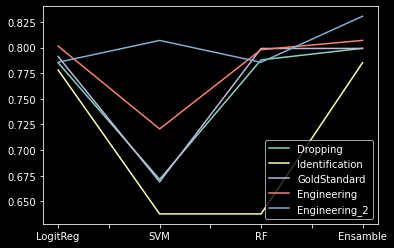

In [205]:
# accuracy with the cross validation - looks like engineering and gold stadandard are the best
# but they seem to overfit because did not get a good score on kaggle!!
plt.style.use('dark_background')

df.plot.line()

In [206]:
df1 = df.T.reset_index()
df1

,index,LogitReg,SVM,RF,Ensamble
0,Dropping,0.785098,0.671427,0.787954,0.799251
1,Identification,0.778085,0.637713,0.637713,0.785226
2,GoldStandard,0.791256,0.669010,0.799109,0.799140
3,Engineering,0.801350,0.720601,0.797979,0.806974
4,Engineering_2,0.785669,0.806955,0.785632,0.830544


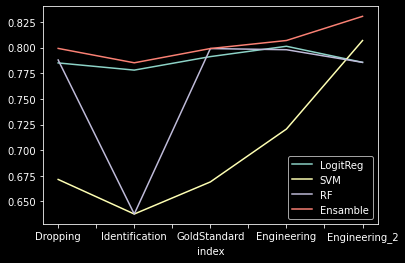

In [207]:
# this plot show more the effects of each treatment on the different classifiers, i am not sure it is interesting for us!

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
df1.plot(kind='line', x='index', y='LogitReg', ax=axes);
df1.plot(kind='line', x='index', y='SVM', ax=axes);
df1.plot(kind='line', x='index', y='RF', ax=axes);
df1.plot(kind='line', x='index', y='Ensamble', ax=axes);

In [208]:
dfm = df.melt(value_vars=['GoldStandard','Dropping','Identification','Engineering','Engineering_2'], ignore_index=False).reset_index()
dfm

,index,variable,value
0,LogitReg,GoldStandard,0.791256
1,SVM,GoldStandard,0.669010
2,RF,GoldStandard,0.799109
3,Ensamble,GoldStandard,0.799140
4,LogitReg,Dropping,0.785098
5,SVM,Dropping,0.671427
6,RF,Dropping,0.787954
7,Ensamble,Dropping,0.799251
8,LogitReg,Identification,0.778085
9,SVM,Identification,0.637713
